WRITING NAME IN DEVNAGIRI

In [1]:
dev_name = "\u0938\u093F\u092E\u0930\u0928 \u092E\u0924\u092A\u093E\u0932"
print(dev_name)

सिमरन मतपाल


IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules 

In [3]:
d=pd.read_csv('Market_Basket_Optimisation.csv')

In [4]:
d.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Data Wrangling
print("\nNull Values:\n", d.isnull().sum())


Null Values:
 shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64


CREATING TRANSACTIONS

In [6]:

# Step 1: Load data and create a list of transactions (each transaction is a list of items)
with open('Market_Basket_Optimisation.csv', 'r') as file:
    dataset = [list(filter(None, map(str.strip, row))) for row in csv.reader(file, delimiter=',')]

# Step 2: Display the first 10 transactions
for transaction in dataset[:10]:
    print(transaction)


['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']
['low fat yogurt']
['whole wheat pasta', 'french fries']
['soup', 'light cream', 'shallot']
['frozen vegetables', 'spaghetti', 'green tea']
['french fries']


In [7]:
len(dataset)

7501

In [8]:
# Initialize the TransactionEncoder
te = TransactionEncoder()

# Fit and transform the dataset
te_ary = te.fit_transform(dataset)

# Convert the one-hot encoded array into a DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the encoded DataFrame
print(df.head())

   almonds  antioxydant juice  asparagus  avocado  babies food  bacon  \
0     True               True      False     True        False  False   
1    False              False      False    False        False  False   
2    False              False      False    False        False  False   
3    False              False      False     True        False  False   
4    False              False      False    False        False  False   

   barbecue sauce  black tea  blueberries  body spray  ...  turkey  \
0           False      False        False       False  ...   False   
1           False      False        False       False  ...   False   
2           False      False        False       False  ...   False   
3           False      False        False       False  ...    True   
4           False      False        False       False  ...   False   

   vegetables mix  water spray  white wine  whole weat flour  \
0            True        False       False              True   
1           

In [9]:
# 1. Find frequent itemset
freq_itemset = apriori(df,min_support=0.03,use_colnames=True) # taking support as 3%

In [10]:
# Step 3: Find the maximum length of itemsets in the final iteration
max_len = freq_itemset['itemsets'].apply(lambda x: len(x)).max()

# Step 4: Filter out the itemsets that belong to the last iteration (i.e., maximum length itemsets)
last_iteration_itemsets = freq_itemset[freq_itemset['itemsets'].apply(lambda x: len(x)) == max_len]

# Step 5: Add a serial number column
last_iteration_itemsets = last_iteration_itemsets.reset_index(drop=True)

# Step 6: Display the final iteration frequent itemsets with serial numbers
print(last_iteration_itemsets[[ 'itemsets', 'support']])

                              itemsets   support
0                    (chocolate, eggs)  0.033196
1            (french fries, chocolate)  0.034395
2                    (chocolate, milk)  0.032129
3           (chocolate, mineral water)  0.052660
4               (chocolate, spaghetti)  0.039195
5                 (french fries, eggs)  0.036395
6                         (milk, eggs)  0.030796
7                (eggs, mineral water)  0.050927
8                    (spaghetti, eggs)  0.036528
9        (french fries, mineral water)  0.033729
10  (frozen vegetables, mineral water)  0.035729
11          (green tea, mineral water)  0.031063
12        (ground beef, mineral water)  0.040928
13            (ground beef, spaghetti)  0.039195
14               (milk, mineral water)  0.047994
15                   (milk, spaghetti)  0.035462
16           (pancakes, mineral water)  0.033729
17          (spaghetti, mineral water)  0.059725


In [11]:
# Step 2: Generate the association rules based on confidence
rules = association_rules(freq_itemset, metric='confidence', min_threshold=0.25)

# Step 3: Further filter the rules based on lift, e.g., only consider rules with lift >= 1
rules = rules[(rules['lift'] >= 1.5)]  # Set the minimum lift threshold

In [12]:
# Step 4: Select relevant columns including lift
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


In [13]:
print(rules)

           antecedents      consequents   support  confidence      lift
2  (frozen vegetables)  (mineral water)  0.035729    0.374825  1.572463
3        (ground beef)  (mineral water)  0.040928    0.416554  1.747522
4        (ground beef)      (spaghetti)  0.039195    0.398915  2.291162
5               (milk)  (mineral water)  0.047994    0.370370  1.553774
6               (milk)      (spaghetti)  0.035462    0.273663  1.571779


VISUALIZING THE RULES

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


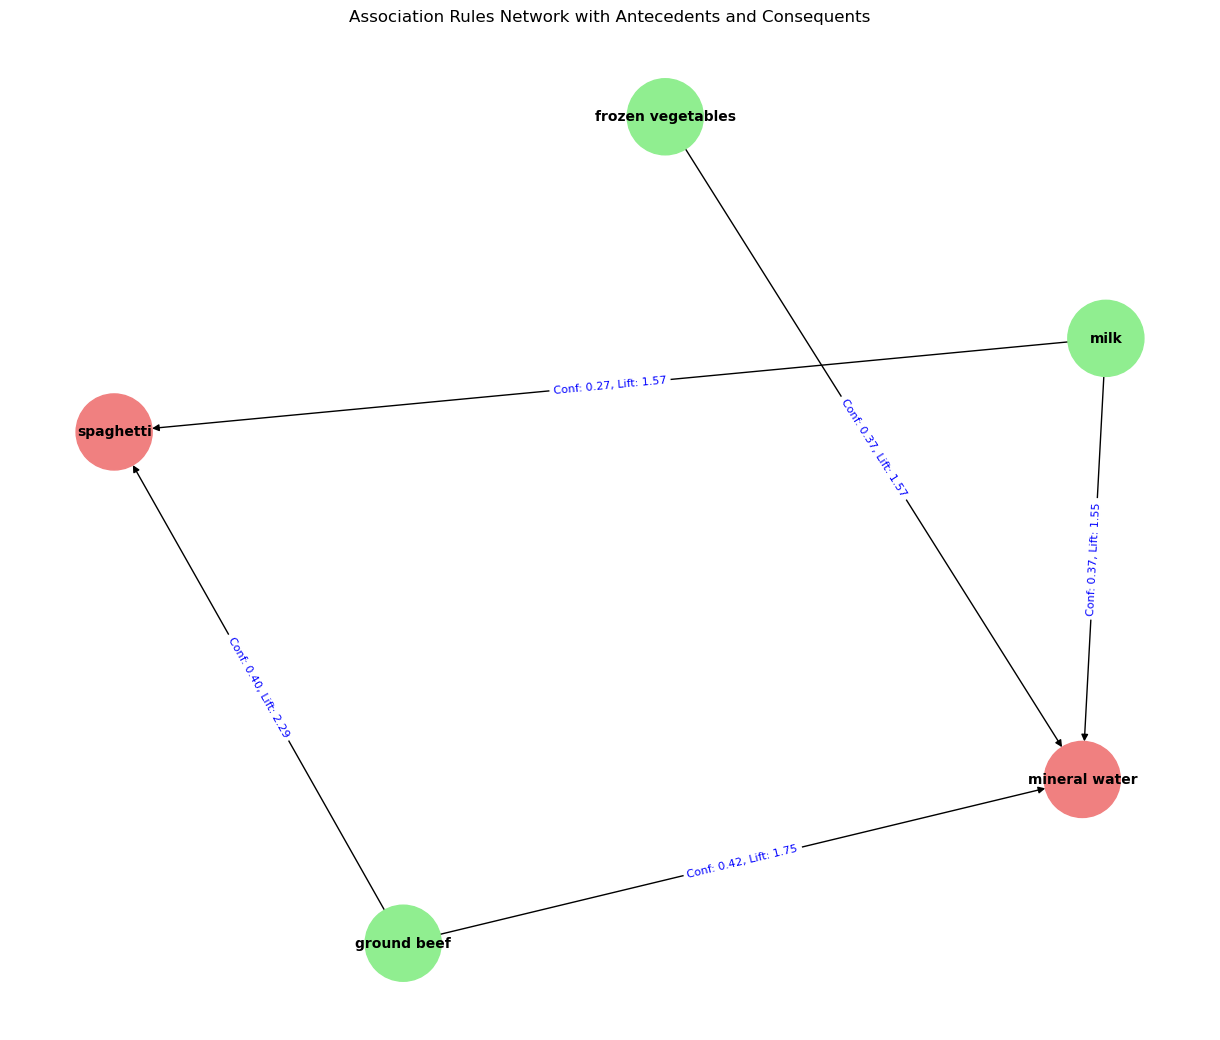

In [14]:

# Step 1: Create a directed graph
G = nx.DiGraph()

# Step 2: Add edges based on antecedents and consequents
for idx, row in rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    
    # Add edges with confidence and lift as attributes
    G.add_edge(antecedent, consequent, weight=row['confidence'], lift=row['lift'])


antecedent_nodes = {', '.join(list(rule.antecedents)) for rule in rules.itertuples()}
consequent_nodes = {', '.join(list(rule.consequents)) for rule in rules.itertuples()}

# Assign colors: green for antecedents, orange for consequents
node_colors = []
for node in G.nodes():
    if node in antecedent_nodes:
        node_colors.append('lightgreen')  # Antecedent color
    elif node in consequent_nodes:
        node_colors.append('lightcoral')  # Consequent color

# Step 4: Plot the graph with layout adjustments
plt.figure(figsize=(12, 10))

# Define positions for the nodes 
pos = nx.spring_layout(G, k=2, seed=42)  # Adjust 'k' for better spacing

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=10, font_weight="bold", arrows=True)

# Draw edge labels (confidence and lift)
edge_labels = {(u, v): f"Conf: {d['weight']:.2f}, Lift: {d['lift']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="blue", font_size=8)

# Show plot
plt.title("Association Rules Network with Antecedents and Consequents")
plt.show()


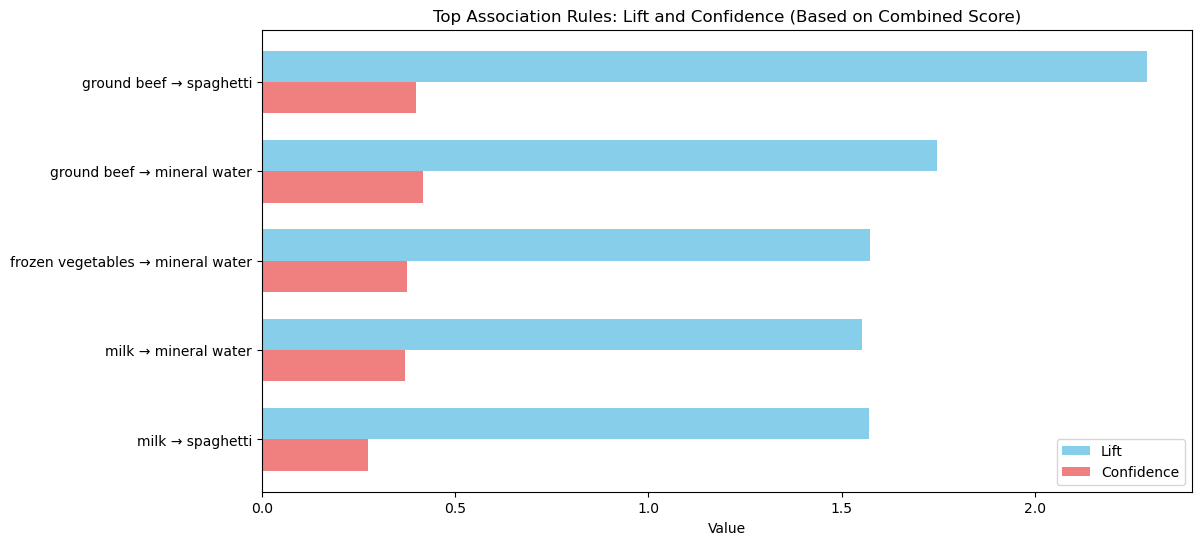

In [15]:
# Step 1: Calculate a combined score
rules['combined_score'] = (rules['lift'] + rules['confidence']) / 2

# Step 2: Sort rules by the combined score and select top 10
top_rules = rules.sort_values(by='combined_score', ascending=False).head(10)

# Step 3: Set up the bar positions
bar_width = 0.35  # Width of each bar
bar_positions = np.arange(len(top_rules))  # Positions of the bars on the y-axis

# Step 4: Create the bar plot
plt.figure(figsize=(12, 6))

# Plot Lift bars
plt.barh(bar_positions, top_rules['lift'], color='skyblue', height=bar_width, label='Lift')

# Plot Confidence bars next to Lift bars
plt.barh(bar_positions + bar_width, top_rules['confidence'], color='lightcoral', height=bar_width, label='Confidence')

# Step 5: Set y-ticks and labels
plt.yticks(bar_positions + bar_width / 2, [f"{', '.join(list(a))} → {', '.join(list(c))}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])])
plt.xlabel('Value')
plt.title('Top Association Rules: Lift and Confidence (Based on Combined Score)')
plt.legend()

# Step 6: Invert y-axis to have the highest values on top
plt.gca().invert_yaxis()

# Step 7: Show the plot
plt.show()
